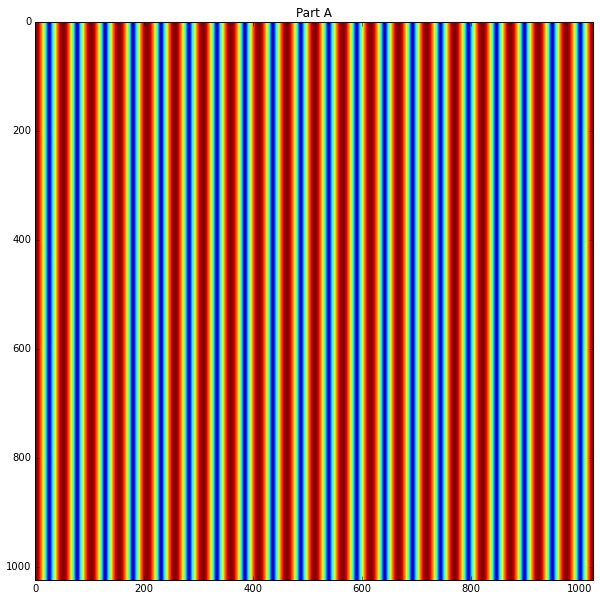

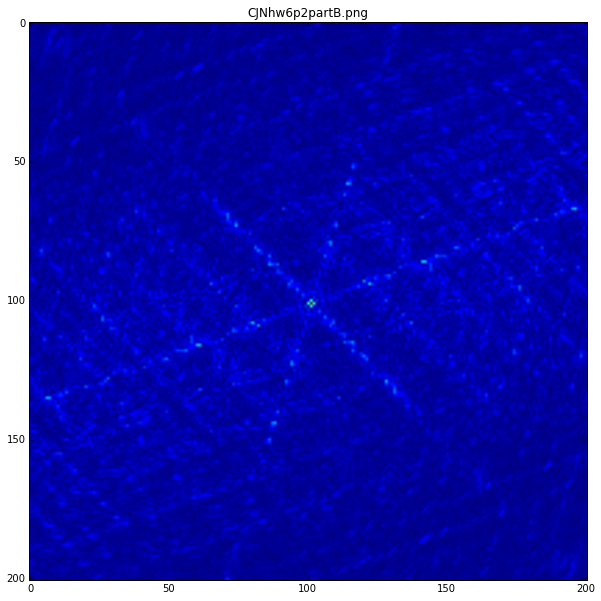

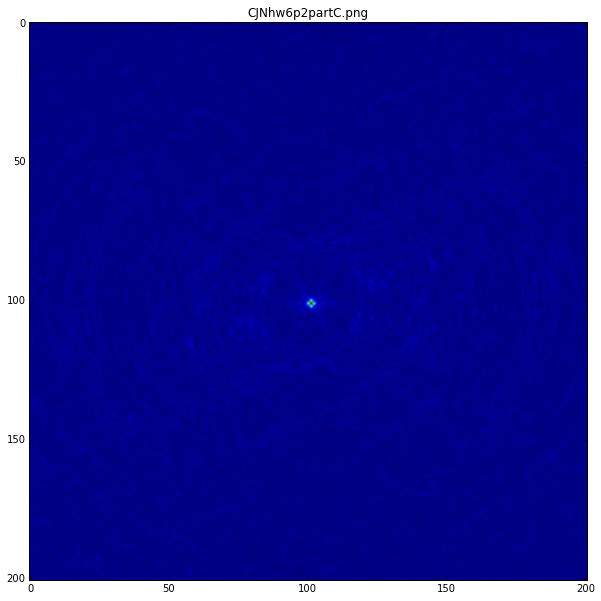

In [1]:
"""
         1         2         3         4         5         6         7      
1234567890123456789012345678901234567890123456789012345678901234567890123456
"""

"""
Cordell Newmiller
Prof. Fassnacht
PHY 266
Homework 6
Problem 2

In this problem you will compute two-dimensional Fourier transforms for both
simple and complicated distributions. In each case, use one of python’s 
Fourier transform packages (e.g., numpy.fft or scipy.fftpack), unless you 
want to do your own direct Fourier transforms. For ease of viewing, do a 
fftshift as the last step so that the center of the diffraction pattern is 
at the center of the 2D image.

(a) Create a 1024×1024 array filled with zeros. Then change pixels [511,501]
and [511,521] to have value 1.0. Take the 2D Fourier transform, and use 
imshow to plot the results.
"""

import numpy
import pyfits
from matplotlib import pyplot
%matplotlib inline

deltapattern = numpy.zeros((1024,1024))
deltapattern[511,501] = 1
deltapattern[511,521] = 1

# fft2 for the 2d transform
transformedpattern= numpy.fft.fft2(deltapattern)

figure1 = pyplot.figure(figsize=(10,10))
pyplot.imshow(numpy.abs(transformedpattern))
# Imshow can only plot real values, e.g. either the real part,
# absolute values, or power spectra
pyplot.title('Part A')

"""
(b) In this problem you will find the beam pattern for a VLA snapshot
observation. On the course smartsite under Resources → Homework → Data is a 
file called visibilities_snapshot.fits. This file contains a fits binary 
table containing two columns, one for u and one for v. Look at the pyfits 
handbook (Resources → python) to see how to extract the data. Now do the 
following to get an estimate of the beam pattern: 
(1) make a 2D histogram, containing 2048 bins along each axis (not optimal, 
but relatively fast), 
(2) set each bin with a value larger than 1 to have a value of 1, 
(3) take the 2D Fourier transform, 
(4) mulitply the FT by its complex conjugate to get the power spectrum/beam 
pattern, 
(5) use fftshift to shift to the center, 
(6) make a png file showing the central 200x200 region (roughly, if you want
to use a graphical zoom), which should contain the peak of the beam pattern.
"""

def myvisibilities(inputfilename,outputfilename):
    hdulist = pyfits.open(inputfilename)
    binlist = hdulist[1].data
    # This object isn't yet an array, so we need to extract the data first
    u = binlist.field(0)
    v = binlist.field(1)

    histpattern,_,_ = numpy.histogram2d(u,v,bins=2048)
    histpattern[histpattern>1]=1

    transformedhist = numpy.fft.fft2(histpattern)
    shiftedhist = numpy.fft.fftshift(transformedhist)

    pyplot.figure(figsize=(10,10))
    pyplot.imshow(numpy.abs(shiftedhist[923:1124,923:1124]))
    pyplot.title(outputfilename)
    # Zoomed to central 200x200 region of a 2048x2048 image

    pyplot.savefig(outputfilename)


myvisibilities('visibilities_snapshot.fits',"CJNhw6p2partB.png")

"""
(c) Repeat the previous part but with visibilities_longtrack.fits.
"""

myvisibilities('visibilities_longtrack.fits',"CJNhw6p2partC.png")

# End of problem 2